# TD8 : Puissance d'un test statistique

Christelle Gonindard, Margaux Leroy et François Bettega


## 1. Contexte :

Un test statistique est une procédure de décision entre deux hypothèses. Il s’agit de statistique inférentielle : à partir de calculs réalisés sur des données observées, nous émettons des conclusions sur la population, en leur rattachant des risques de se tromper.
Le tableau suivant met en évidence les deux risques d’erreur possibles :

<img src="Figures/TD1_17.jpeg" />

Dans cette partie, nous proposons de tester l’influence de la taille des échantillons et des conditions initiales sur les risques d’erreur $\alpha$ et $\beta$ lors du test de Student de comparaison de deux échantillons indépendants.

## 2. Risque d'erreur de première espèce 

Il représente la probabilité de rejeter l’hypothèse nulle $H_0$ (et donc d'accepter $H_1$) alors qu’en réalité $H_0$ est vraie :

$$ \alpha = P(\textrm{rejet de }H_0 | H_0 \textrm{ vraie})$$ 

Lors d’un test, l’expérimentateur est entièrement libre de fixer la limite supérieure de ce risque d’erreur appelée niveau ou seuil de significativité et généralement noté $\alpha$. 

Cependant, l’usage a consacré comme seuils habituels : 0.05 ou 5 % et 0.01 ou 1 %. Nous le fixerons ici à 0.05.
0.05, c'est une chance sur 20 de se tromper… Des seuils plus faibles sont parfois utilisés en physique ou en médecine.

Nous allons explorer ce qu'il se passe lorsqu'on outre passe des conditions d'applications du test de Student, avec des échantillons de différente taille.
Pour ce, on va simuler deux populations qui ont un taux de cholestérol moyen de 1.6 mg/L avec un écart-type de 0.4 mg/L qui suivent deux lois différentes :
- une population A suit une loi normale
- une population B suit une loi exponentielle


Nous allons simuler également deux autres populations qui ont un taux de cholestérol moyen de
2 mg/L avec un écart-type de 0.4 mg/L qui suivent deux lois différentes :
- une population C suit une loi normale
- une population D suit une loi exponentielle

Ensuite, à partir de ces deux populations, nous extrairons dans un premier temps deux échantillons indépendants A1 et A2 de la population A que nous comparerons avec un test de Student puis deux échantillons indépendants B1 et B2 de la population B que nous comparerons également avec un test de Student. Les échantillons appartenant à la même population le test de
Student devrait avoir une *p*-value supérieure à 0.05 correspondant à l’hypothèse $H_0$.
Nous répèterons cette expérience 1000 fois sur des échantillons de petites tailles puis de tailles plus grandes. Pour faciliter ce travail, le code de la fonction vous est donné ci-dessous :   

In [1]:
# Partie contenant la programmation de la fonction de comparaison d'échantillon par un test de Student

check.test = function(test,samplesize1, samplesize2, dist1, dist2, count) 
{
  resultat <- rep(0,count)
  for (i in 1:count) 
    resultat[i] <- test(dist1(samplesize1), dist2(samplesize2))
  resultat
}

t.test.pvalue = function(x,y) t.test(x,y)$p.value

normalea_egale     = function(x) rnorm(x, 1.6, 0.4)
normalea_different = function(x) rnorm(x, 2,   0.4)


expalea_egale     = function(x) rexp(x, 1/1.6)
expalea_different = function(x) rexp(x, 1/2)


graph_pvalue=function(taille_echantillon_1, taille_echantillon_2, echantillon, nbr_simul, loi_echantillon)
{
  if(echantillon=="egaux" & loi_echantillon=="normale")
    plot(factor(check.test(t.test.pvalue, taille_echantillon_1, taille_echantillon_2, normalea_egale, normalea_egale,     nbr_simul) > 0.05),main="Echantillons égaux, loi Normale")
  if(echantillon=="different" & loi_echantillon=="normale")
    plot(factor(check.test(t.test.pvalue, taille_echantillon_1, taille_echantillon_2, normalea_egale, normalea_different, nbr_simul) > 0.05),main="Echantillons différents, loi Normale")
  if(echantillon=="egaux" & loi_echantillon=="exponentielle")
    plot(factor(check.test(t.test.pvalue, taille_echantillon_1, taille_echantillon_2, expalea_egale,  expalea_egale,      nbr_simul) > 0.05),main="Echantillons égaux, loi exponentielle")
  if(echantillon=="different" & loi_echantillon=="exponentielle")
    plot(factor(check.test(t.test.pvalue, taille_echantillon_1, taille_echantillon_2, expalea_egale,  expalea_different,  nbr_simul) > 0.05),main="Echantillons différents, loi exponentielle")
     }



La fonction *graph_pvalue* réalise une série de tests de Student sur plusieurs échantillons et renvoie un graphique représentant les décisions prises par le test. Cette fonction prends trois arguments :

*graph_pvalue(taille échantillon 1; taille échantillon 2; "egaux ou différent"; nbr_simul; "loi")*

- **taille_echantillon_1ou2** : la taille des échantillons 1 et 2 qui vont être extraits
- **échantillons extraits d’une même population ou pas** : le terme egaux correspond à deux échantillons extraits d’une même population et différent correspond à deux échantillons extrait de deux populations différentes mais de même loi
- **nbr_simul** : nombre d’échantillons extraits, ce qui correspond aux nombres de tests de Student que l’on effectuera
- **loi :** la loi de la population choisie, elle peut prendre les valeurs "normale" ou "exponentielle"

La colonne FALSE présente sur le graphique le nombre de fois que l’on rejette $H_0$ et la colonne TRUE le nombre de fois où $H_0$ ne peut pas être rejetée.

**Premier exemple** : Simulons 1000 couples de deux échantillons appartenant à une même population, de grandes tailles (n=100) et suivant une loi normale ou une loi exponentielle



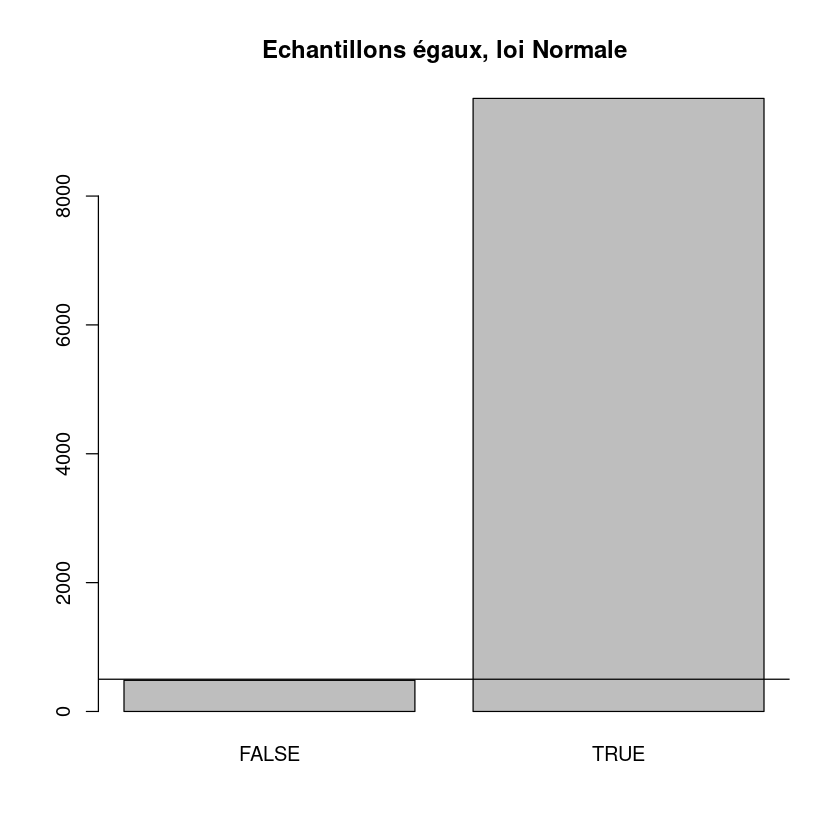

In [2]:
# Simulation de 1000 couples d'échantillons de taille  300 et 30 suivant 
# une loi normale
graph_pvalue(taille_echantillon_1 = 300,taille_echantillon_2 = 30,echantillon = "egaux",nbr_simul = 10000
             ,loi_echantillon = "normale")
abline(h=0.05 * 10000)

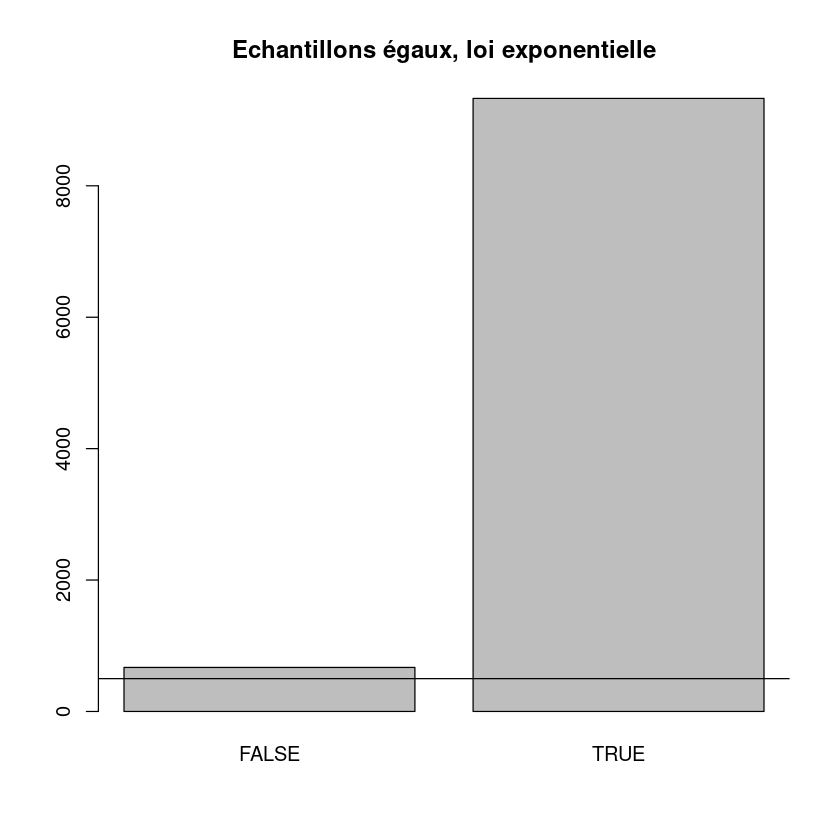

In [3]:
# Simulation de 1000 couples d'échantillons de taille 300 et 30
# suivant une loi exponentielle


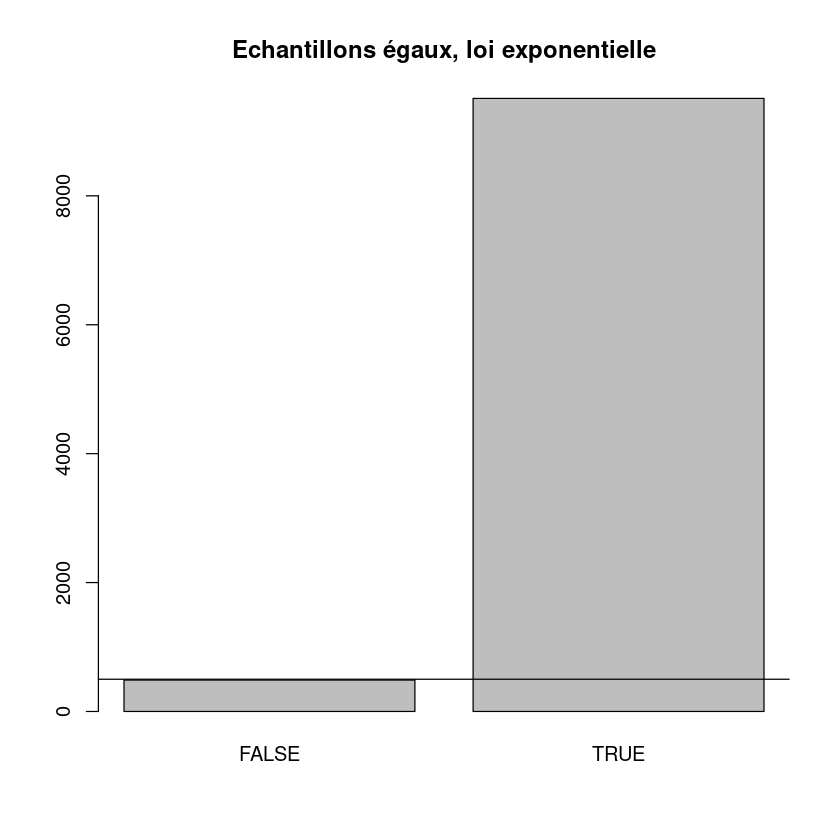

In [4]:
# Simulation de 1000 couples d'échantillons de taille 30 et 30
# suivant une loi exponentielle


On remarque quand dans les deux cas, que ce soit pour des échantillons suivant une loi normale ou pour des échantillons suivant une loi exponentielle l’hypothèse $H_0$ est très rarement rejetée (colonne False).

**Deuxième exemple** : Simulons 1000 couples de deux échantillons appartenant à une même population, de petite taille (n=5), suivant une loi normale ou une loi exponentielle

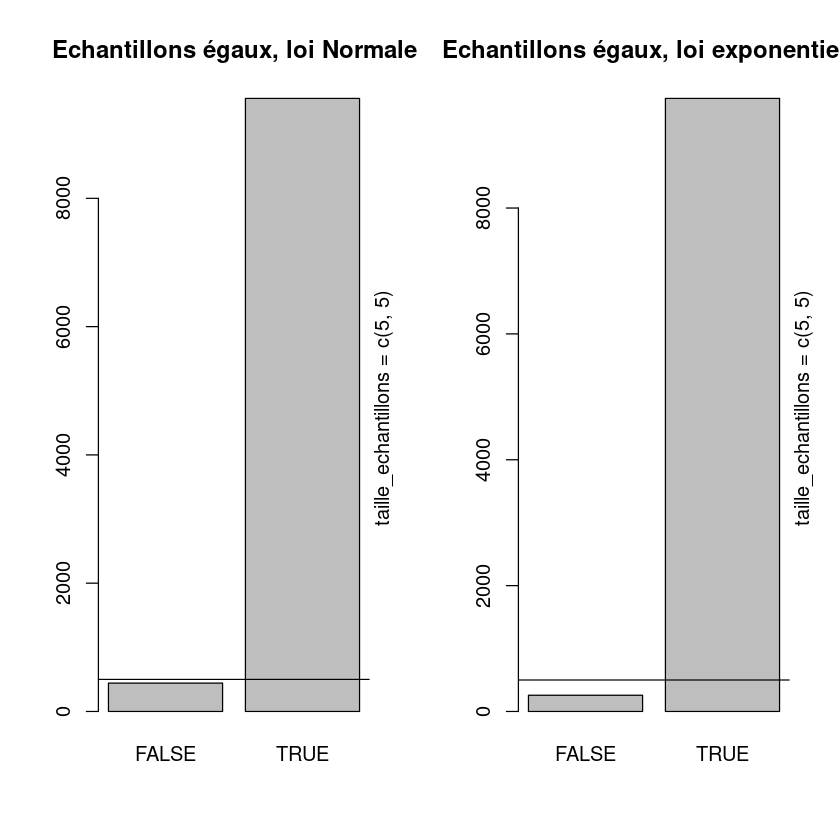

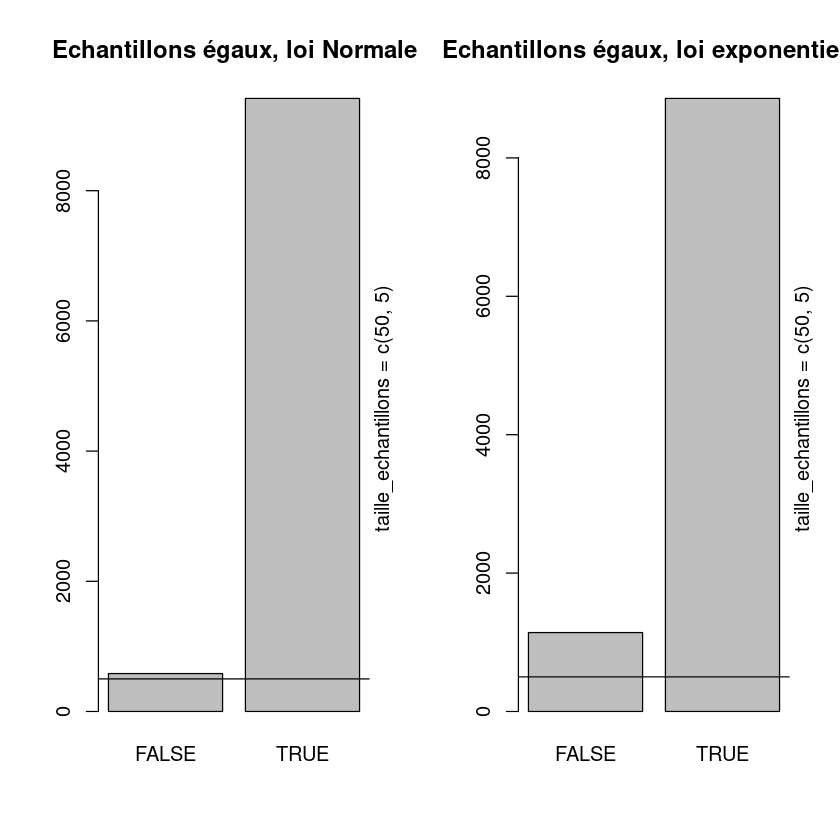

In [5]:
par(mfrow = c(1,2))
# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi normale
graph_pvalue(taille_echantillon_1 = 5, taille_echantillon_2 = 5, echantillon = "egaux", nbr_simul = 10000, loi_echantillon = "normale")
abline(h=0.05 * 10000)
mtext(text = "taille_echantillons = c(5, 5)",side = 4)

# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi exponentielle
graph_pvalue(taille_echantillon_1 = 5, taille_echantillon_2 = 5, echantillon = "egaux", nbr_simul = 10000, loi_echantillon = "exponentielle")
abline(h=0.05 * 10000)
mtext(text = "taille_echantillons = c(5, 5)",side = 4)

# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi normale
graph_pvalue(taille_echantillon_1 = 50, taille_echantillon_2 = 5, echantillon = "egaux", nbr_simul = 10000, loi_echantillon = "normale")
abline(h=0.05 * 10000)
mtext(text = "taille_echantillons = c(50, 5)",side = 4)

# Simulation de 1000 couples d'échantillons de taille 100 suivant 
# une loi exponentielle
graph_pvalue(taille_echantillon_1 = 50, taille_echantillon_2 = 5, echantillon = "egaux", nbr_simul = 10000, loi_echantillon = "exponentielle")
abline(h=0.05 * 10000)
mtext(text = "taille_echantillons = c(50, 5)",side = 4)

On peut remarquer un effet combiné de la non-normalité et de la différence d'effectifs dans les 2 échantillons. (On dit que les effectifs sont non-balancés)

Vous pouvez vous entrainer à tester d'autres simulations. 

## 3. Risque d'erreur de deuxième espèce 

Il représente la probabilité que le test ne soit pas conclusif, alors que $H_0$ faux :

$$ \beta = P(\textrm{non-rejet de } H_0 | H_0 \textrm{ est fausse})$$

$\beta$ caractérise le manque de puissance du test, c'est-à-dire son incapacité à mettre en évidence une différence.

1 - $\beta$ caractérise la puissance du test. Elle est fonction de la forme de l’hypothèse alternative (bilatérale ou unilatérale) et, pour une valeur de $\alpha$ fixée, est d’autant meilleure que la **taille des échantillons utilisée est importante.** L'effet de la taille des échantillons sur la puissance du test est mesurée par les **degrés de liberté**.

Dans les tests habituels, plus $\alpha$ est choisi petit, plus la valeur de $\beta$ augmente et réciproquement : ainsi les deux risques d’erreur sont liés. C'est pour un test de grossesse basé sur un seuil de concentration hormonal au-delà duquel je considère qu'il y a une grossesse ; si j'augmente la valeur du seuil, je diminue le risque de faux positif, mais inévitablement, j'augmente le risque de faux négatif.

<img src="Figures/TD1_18.jpeg" />

En général, on construit les expériences en vue de rejeter $H_0$. Si on rejette $H_0$, on a un résultat, si on ne rejette pas $H_0$, *ceci ne veut pas dire que $H_0$ est vraie*. On a juste un test **non conclusif**. On veut en priorité minimiser le risque que le test soit faussement conclusif. Il s'agit du risque $\alpha$. 
En pratique, on choisit donc une valeur $\alpha$, typiquement $0.05$, rarement $0.1$, et parfois $0.01$ ou encore plus faible.
Ensuite, on calcule, pour un effectif $n$ donné, la puissance $1-\beta$ qui en résulte. Ceci est utile pour planifier une expérience, et décider si l'on doit augmenter l'effectif ou non.

La puissance d’un test est fonction de la nature de H1, un test unilatéral est plus puissant qu’un
test bilatéral, mais il faut une forte justification théorique pour choisir un test unilatéral.

Testons la puissance du test de Student :

**Troisième exemple** : Simulons 1000 couples de deux échantillons appartenant à deux populations différentes de grande taille (n=100), suivant une loi normale (testons la population A contre la C) ou une loi exponentielle (Testons la populations B contre la D)

In [ ]:
par(mfrow = c(1,2))
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi normale
graph_pvalue(taille_echantillon_1 = 100,taille_echantillon_2 = 100,echantillon = "different",nbr_simul = 1000,loi_echantillon = "normale")

# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(taille_echantillon_1 = 100,taille_echantillon_2 = 100,echantillon = "different",nbr_simul = 1000,loi_echantillon = "exponentielle")


Lorsque l’on compare deux populations différentes de grands échantillons (n=100) et suivant
une loi normale, le test de Student rejette systématiquement l’hypothèse H0 ($\beta \approx 0$). En revanche, si les deux échantillons suivent une loi exponentielle, dans ce cas, le test de Student ne parvient pas à détecter l'inadequation entre les données et $H_0$ dans environs 50% des cas ($\beta \approx 0.5$).

Regardons ce qui se passe qi l'on rajoute 50 individus à chaque échantillon :

In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(taille_echantillon_1 = 150,taille_echantillon_2 = 150,echantillon = "different",nbr_simul = 1000
             ,loi_echantillon = "exponentielle")


La puissance statistique reste faible, mais c'est déjà nettement mieux !

**Quatrième exemple** : Simulons 1000 couples de deux échantillons appartenant à deux populations
différentes et de petite taille (n=5) et suivant une loi normale (testons la population A contre la C) ou une loi exponentielle (Testons la population B contre la D)

In [ ]:
# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi normale
graph_pvalue(5,"different",1000,"normale")

# Simulation de 1000 couples d'échantillons de taille 100 
# suivant une loi exponentielle
graph_pvalue(5,"different",1000,"exponentielle")

Lorsque l’on compare deux populations différentes de petits échantillons (n=5) et suivant
une loi normale, le test de Student rejette parfois H0, mais le plus souvent, il reste inconclusif. Le test aurait eu plus de puissance avec plus de données, ou/et si la différence entre les deux groupes était plus importante. En revanche, si les deux échantillons suivent une loi exponentielle, dans ce cas, le test de Student se trompe dans la grande majorité des cas (H0 n’est pas rejetée dans la majorité des cas, ce qui correspond à une réponse fausse du test).


**Pour conclure : la puissance d'un test dépend de la taille des échantillons, de la différence entre les groupes (<u>taille de l'effet</u>), plus elles sont grandes et plus le test est puissant. Le fait que la taille des échantillons soit équilibrée augmente aussi la puissance du test, ainsi que, dans le cadre du test de Student, la robustesse du test au non-respect de ses conditions d'application.**